# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [103]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [105]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [107]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [111]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [113]:
html 

'<html lang="en"><head>\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1">\n  <meta name="description" content="">\n  <title>Mars Temperature Data</title>\n\n  <link rel="stylesheet" type="text/css" href="css/bootstrap.min.5.2.2.css">\n  <link rel="stylesheet" type="text/css" href="css/temp.css">\n</head>\n\n<body>\n\n  <main>\n    <div class="container py-4">\n      <header class="pb-3 mb-4 border-bottom">\n        <a href="/" class="d-flex align-items-center text-dark text-decoration-none">\n          <span class="fs-4">Mission To Mars</span>\n        </a>\n      </header>\n\n      <div class="p-5 mb-4 bg-light rounded-3">\n        <div class="container-fluid py-5">\n          <h1 class="display-5 fw-bold">Mars Temperature Data</h1>\n          <p class="col-md-8 fs-4">This is Mars data.</p>\n\n          <table class="table">\n            <tbody><tr>\n              <th>id</th>\n              <th>terrestrial_date</th>\n              <th>so

In [115]:
soup.find?

Signature: soup.find(name=None, attrs={}, recursive=True, string=None, **kwargs)
Docstring:
Look in the children of this PageElement and find the first
PageElement that matches the given criteria.

All find_* methods take a common set of arguments. See the online
documentation for detailed explanations.

:param name: A filter on tag name.
:param attrs: A dictionary of filters on attribute values.
:param recursive: If this is True, find() will perform a
    recursive search of this PageElement's children. Otherwise,
    only the direct children will be considered.
:param limit: Stop looking after finding this many results.
:kwargs: A dictionary of filters on attribute values.
:return: A PageElement.
:rtype: bs4.element.Tag | bs4.element.NavigableString
File:      c:\users\ccogg\anaconda3\lib\site-packages\bs4\element.py
Type:      method

In [132]:
# Extract all rows of data
# Extract the table
table = soup.find('table', class_='table')  # Assuming the table has a class named 'table'

# Extract all rows of data from the table
table_rows = table.find_all('tr')

In [134]:
#soup.find_all('tr')[0].find_all('th')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [137]:
#pd.DataFrame([{'id':2}])

In [139]:
# Create an empty list to store the rows
data = []


# Loop through the scraped data to create a list of rows
for row in table_rows[1:]:  # Skip the header row by slicing [1:]
    cells = row.find_all('td')
    row_data = [cell.text.strip() for cell in cells]
    data.append(row_data)


# Print the scraped data to verify
for row in data:
    print(row)

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

In [126]:
pd.read_html(url)[0]

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [141]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Define the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a Pandas DataFrame
mars_weather_df = pd.DataFrame(data, columns=columns)

In [145]:
# Confirm DataFrame was created successfully by printing its head
print(mars_weather_df.head())

   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [151]:
# Examine data type of each column
print(mars_weather_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [153]:
# Change data types for data analysis
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

# Convert sol, ls, month, min_temp, and pressure to numeric types
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(float)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

In [155]:
# Confirm type changes were successful by examining data types again
print(mars_weather_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [157]:
# 1. How many months are there on Mars?
unique_months = mars_weather_df['month'].nunique()
print(f"There are {unique_months} months on Mars.")

There are 12 months on Mars.


In [159]:
# 2. How many sols (Martian days) worth of data are there?
total_sols = mars_weather_df['sol'].nunique()
print(f"There are {total_sols} sols worth of data.")

There are 1867 sols worth of data.


In [165]:
# 3. What is the average minimum temperature by month?
#average_minimum = mars_weather_df['min_temp'].mean()
#print(f"The average minimum {average_minimum} by month.")
# Group by month and calculate the average minimum temperature
avg_min_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()

print(avg_min_temp_by_month)


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


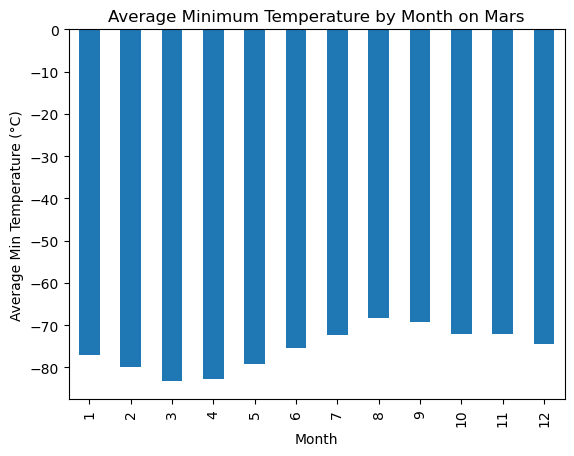

In [167]:
# Plot the average minimum temperature by month
avg_min_temp_by_month.plot(kind='bar', xlabel='Month', ylabel='Average Min Temperature (°C)', title='Average Minimum Temperature by Month on Mars')
plt.show()

In [169]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
coldest_month = avg_min_temp_by_month.idxmin()
hottest_month = avg_min_temp_by_month.idxmax()
print(f"The coldest month is {coldest_month}, and the hottest month is {hottest_month}.")

The coldest month is 3, and the hottest month is 8.


In [171]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()

print(avg_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


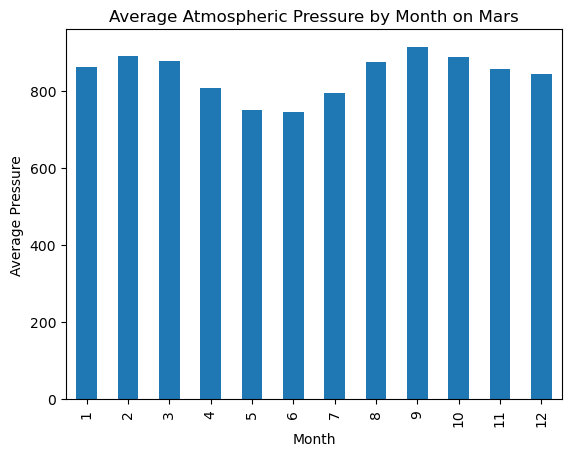

In [173]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar', xlabel='Month', ylabel='Average Pressure', title='Average Atmospheric Pressure by Month on Mars')
plt.show()

In [175]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
lowest_pressure_month = avg_pressure_by_month.idxmin()
highest_pressure_month = avg_pressure_by_month.idxmax()
print(f"The month with the lowest pressure is {lowest_pressure_month}, and the month with the highest pressure is {highest_pressure_month}.")

The month with the lowest pressure is 6, and the month with the highest pressure is 9.


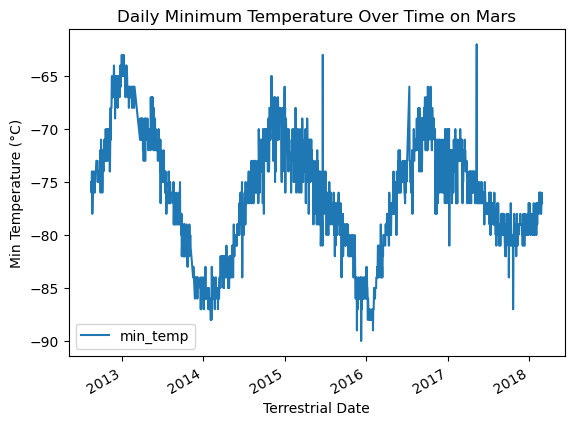

In [179]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_weather_df.plot(x='terrestrial_date', y='min_temp', kind='line', title='Daily Minimum Temperature Over Time on Mars', xlabel='Terrestrial Date', ylabel='Min Temperature (°C)')
plt.show()

#### Minimum Temperature

Observing Seasons: As the line plot shows the daily minimum temperatures over time, we see periodic rises and falls in the temperature. These fluctuations represent the seasonal changes on Mars.

Peaks and Troughs: The warmest and coldest periods (peaks and troughs) correspond to Martian "summer" and "winter." We can approximate the duration of a Martian year by counting how long it takes for the temperature to rise, fall, and return to a similar point in the seasonal cycle (i.e., one full cycle)
.
Approximation: Since the plot is on Earth’s calendar (terrestrial dates), we can estimate how many Earth days correspond to one full Martian year based on these temperature cycles.

#### Atmospheric Pressure

Seasonal Changes: Like the minimum temperature, atmospheric pressure on Mars exhibits seasonal variations. As carbon dioxide freezes and sublimates, it affects the pressure.

Cyclic Nature: We should observe similar periodic rises and falls in atmospheric pressure, corresponding to the Martian seasons
.
Correlation with Temperature: Atmospheric pressure and temperature cycles are closely linked on Mars, and they can help further validate our estimation of the length of the Martian yea
r.
Estimating Year Length: Again, by observing how long it takes for one full cycle of pressure changes to occur, we can estimate the length of a Martian year in Earth days.

#### Year Length

Visual Estimation:
By inspecting the temperature and pressure plots, we can visually estimate how long one full seasonal cycle (one Martian year) takes.One such full seasonal cycle could be 2015 to 2017..

Identifying Key Points:
Suppose the minimum temperature reaches a trough (coldest point) in late Marc232023 and again in late March 2024. This would suggest that one full Martian year has passed in approximately 687 Earth days, which is close to the known length of a Martian year.

Estimate Based on Data:
A Martian year is approximately 687 Earth days. By visually inspecting the plot, we can thatrify if the duration between two similar temperature or pressure extremes (e.g., two coldest months) aligns with this.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [181]:
# Write the data to a CSV
mars_weather_df.to_csv('mars_weather_data.csv', index=False)
print("Data has been written to mars_weather_data.csv")

Data has been written to mars_weather_data.csv


In [22]:
browser.quit()